# Wolfram Language Tutorial (Jupyter Front-End)
Here we will cover some programming basics in Wolfram Language that will be useful throughout the workshop.
### **Working in a Jupyter notebook**
During this workshop, we'll be demoing code examples using a Jupyter notebook environment. To run a code cell in the notebook, first select the code cell anywhere with your cursor. You may execute the cell by using the keyboard shortcut Shift+Enter or Command+Enter.
Test running the following cell:

In [3]:
pi = 22/7;
StringTemplate["`1` is an approximation for pi."][pi]

3.14286 is an approximation for pi.

<div class="alert alert-block alert-warning">
<b>Note: </b>
We'll alternate showing content using Python and the Wolfram Language.
Make sure the Kernel (under Logout, top-right) lists `Wolfram Language 12.2` or `Python 3`, as appropriate for each notebook.
<br></br>
<br></br>
The notebooks are named with a trailing `wl` or `py` for convenience. 
You can also usually distinguish by examining the first couple of lines of code - the Wolfram Language, unlike Python, uses capitalized built-in function names.
<br></br>
<br></br>
If you need to change the Kernel, you can do so by navigating to `Kernel > Change Kernel` in the Menu bar.
</div>

### **A quick note about jupyter notebooks**
Notebooks are a useful way to organize and annotate code especially for demos, support $\LaTeX$ for writing mathematical expressions, and allow code to be executed in smaller blocks (cells) that can help to simplify a large program. However, there are a couple of important points to keep in mind:
- The block structure allows code to be run out of order, so be careful that you've executed your cells in order from top to bottom.
- ***Jupyter notebook remembers your history of running code, even after you delete the code.*** Variables, objects, and functions you define persist throughout your notebook while your session is active, even if you delete the cell(s) that defined them. If you want to delete or rename a variable, make sure you update its occurrences throughout the notebook. You can restart your runtime (go to Kernel -> Restart at the top menu) and run all cells to check for any undefined variables.

## Quick Start
Perhaps the easiest way to get started in the `Wolfram Language` is using free-form string input. You've likely come across `Wolfram Alpha` before in your studies, which attempts to interpret a user's string input computationally; the equivalent programmatic way in a Jupyter notebook is using `SemanticInterpretation`:

-Graphics-
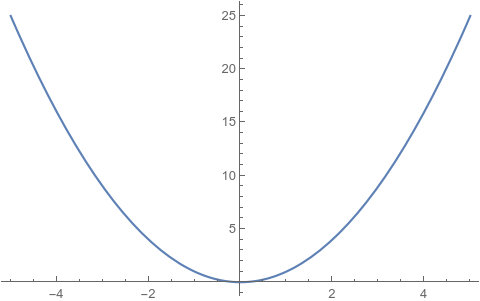

In [5]:
SemanticInterpretation["plot x^2 from -5 to 5"]

This (often) works for more traditional coding instructions, such as variable assignment:

In [6]:
SemanticInterpretation["assign a to 5"];
a

5

<div class="alert alert-block alert-info">
<b>Tip:</b> Feel free to use this model to get started. In-fact in the native Mathematica (or Wolfram Cloud) notebooks, the equivalent method using "= plot x^2 from -5 to 4" (note the leading "="), will also return what the valid Wolfram Language input is.
</div>

This gets quite cumbersome quick, and incurs computational cost in interpreting the string input. As such, we won't be using this model in the workshop.

## Documentation
Mathematica has _thousands_ of built-in functions. These are often intuitively-named, so if you have an idea of what you'd like to do, it's often beneficial to query the Documentation.

Graphics[primitives, options] represents a two-dimensional graphical image. 


Attributes[Graphics]={Protected, ReadProtected}


Options[Graphics]={AlignmentPoint -> Center, AspectRatio -> Automatic, Axes -> False, 
 
>    AxesLabel -> None, AxesOrigin -> Automatic, AxesStyle -> {}, Background -> None, 
 
>    BaselinePosition -> Automatic, BaseStyle -> {}, ColorOutput -> Automatic, 
 
>    ContentSelectable -> Automatic, CoordinatesToolOptions -> Automatic, 
 
>    DisplayFunction :> $DisplayFunction, Epilog -> {}, FormatType :> TraditionalForm, 
 
>    Frame -> False, FrameLabel -> None, FrameStyle -> {}, FrameTicks -> Automatic, 
 
>    FrameTicksStyle -> {}, GridLines -> None, GridLinesStyle -> {}, ImageMargins -> 0., 
 
>    ImagePadding -> All, ImageSize -> Automatic, ImageSizeRaw -> Automatic, 
 
>    LabelStyle -> {}, Method -> Automatic, PlotLabel -> None, PlotRange -> All, 
 
>    PlotRangeClipping -> False, PlotRangePadding -> Automatic, PlotRegion -> Automatic, 
 
>    PreserveImageOptions -> Automatic, Prolog -> {}, RotateLabel -> True, 
 
>    Ticks -> Automatic, TicksStyle -> {}}
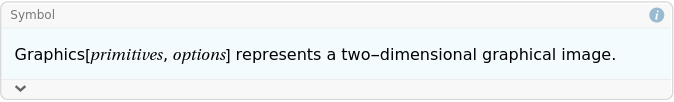

In [8]:
?Graphics

AcyclicGraphQ                     GraphEmbedding
 
>    IncidenceGraph

AdjacencyGraph                    GraphHighlight
 
>    IndexEdgeTaggedGraph

BarabasiAlbertGraphDistribution   GraphHighlightStyle
 
>    IndexGraph

BernoulliGraphDistribution        GraphHub
 
>    IsomorphicGraphQ

BipartiteGraphQ                   Graphics
 
>    KEdgeConnectedGraphQ

BooleanGraph                      Graphics3D
 
>    KirchhoffGraph

BoundaryDiscretizeGraphics        Graphics3DBox
 
>    KnightTourGraph

ButterflyGraph                    Graphics3DBoxOptions
 
>    KVertexConnectedGraphQ

CacheGraphics                     GraphicsArray
 
>    LayeredGraphPlot

CanonicalGraph                    GraphicsBaseline
 
>    LineGraph

CayleyGraph                       GraphicsBox
 
>    LoopFreeGraphQ

CirculantGraph                    GraphicsBoxOptions
 
>    MeanGraphDistance

CommunityGraphPlot                GraphicsColumn
 
>    MeshConnectivityGraph

CompleteGraph                     GraphicsComplex
 
>    MixedGraphQ

CompleteGraphQ                    GraphicsComplex3DBox
 
>    MoleculeGraph

ConnectedGraphComponents          GraphicsComplex3DBoxOptions
 
>    MorphologicalGraph

ConnectedGraphQ                   GraphicsComplexBox
 
>    NearestNeighborGraph

ContourGraphics                   GraphicsComplexBoxOptions
 
>    NeighborhoodGraph

CycleGraph                        GraphicsContents
 
>    NestGraph

DeBruijnGraph                     GraphicsData
 
>    NetGraph

DegreeGraphDistribution           GraphicsGrid
 
>    PathGraph

DensityGraphics                   GraphicsGridBox
 
>    PathGraphQ

DirectedGraph                     GraphicsGroup
 
>    PetersenGraph

DirectedGraphQ                    GraphicsGroup3DBox
 
>    PlanarGraph

DiscretizeGraphics                GraphicsGroup3DBoxOptions
 
>    PlanarGraphQ

DynamicGeoGraphics                GraphicsGroupBox
 
>    PriceGraphDistribution

EdgeTaggedGraph                   GraphicsGroupBoxOptions
 
>    RandomGraph

EdgeTaggedGraphQ                  GraphicsGrouping
 
>    RelationGraph

EdgeWeightedGraphQ                GraphicsRow
 
>    ReverseGraph

EmptyGraphQ                       GraphicsSpacing
 
>    SimpleGraph

EulerianGraphQ                    GraphicsStyle
 
>    SimpleGraphQ

ExpressionGraph                   GraphIntersection
 
>    SoundAndGraphics

FindGraphCommunities              GraphLayout
 
>    SpatialGraphDistribution

FindGraphIsomorphism              GraphLinkEfficiency
 
>    StarGraph

FindGraphPartition                GraphPeriphery
 
>    SurfaceGraphics

FullGraphics                      GraphPlot
 
>    TransitiveClosureGraph

GeoGraphics                       GraphPlot3D
 
>    TransitiveReductionGraph

Graph                             GraphPower
 
>    TreeGraph

Graph3D                           GraphPropertyDistribution
 
>    TreeGraphQ

GraphAssortativity                GraphQ
 
>    TuranGraph

GraphAutomorphismGroup            GraphRadius
 
>    UndirectedGraph

GraphCenter                       GraphReciprocity
 
>    UndirectedGraphQ

GraphComplement                   GraphRoot
 
>    UniformGraphDistribution

GraphData                         GraphStyle
 
>    UseGraphicsRange

GraphDensity                      GraphUnion
 
>    VertexWeightedGraphQ

GraphDiameter                     GridGraph                     WattsStrogatzGraphDistri\
 
>    bution

GraphDifference                   HamiltonianGraphQ             WeaklyConnectedGraphComp\
 
>    onents

GraphDisjointUnion                HararyGraph
 
>    WeaklyConnectedGraphQ

GraphDistance                     HighlightGraph
 
>    WeightedAdjacencyGraph

GraphDistanceMatrix               HypercubeGraph
 
>    WeightedGraphQ

GraphElementData                  ImageGraphics
 
>    WheelGraph
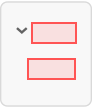

In [12]:
?*Graph*

<div class="alert alert-block alert-danger">
<b>Alert: </b>
The code above on the Wolfram Cloud version of the notebook, returns all built-in functions including the string "Graph".
However, dynamic content, like the one above - unfortunately don't render properly using the Jupyter Front-End.  
</div>

## General Syntax
### Built-in Functions

Generally, most Wolfram Language built-in function are of the form:  

`FunctionName[argument1, argument2, ...optionalArgument, 
option1->optionValue1, option2->optionValue2]`,  

where Arguments are ordered; Options are not not

-Graphics-
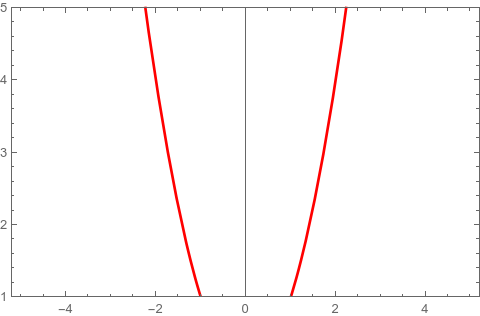

In [16]:
Plot[ x^2, {x, -5, 5},
 PlotRange -> {1, 5},
 PlotStyle -> {Thick, Red},
 Frame -> True]

#### Alternative Function Notation
This is entirely optional, but you'll probably see it around:

In [21]:
f[x]   (*standard notation*)
f@x    (*prefix notation*)
x // f (*postfix notation*)
x~f~y  (*infix notation, for functions with two arguments*)

f[x]
f[x]
f[x]
f[x, y]

<div class="alert alert-block alert-info">
<b>Tip:</b> We just made use of our first in-line comments! Anything between two enclosing `(*` `*)` will be ignored.
</div>

### Lists
The Wolfram Language, unlike python, uses 1-indexing - be careful!  
Lists can be directly constructed by placing elements inside curly brackets:

In [26]:
list={1,Red,"Cat",{4,5,6}}

{1, RGBColor[1, 0, 0], Cat, {4, 5, 6}}

Lists are indexed using the short-hand for `Part`, consisting of **two** square brackets ``[[ ]]``

In [32]:
list[[1]]     (*single element*)
list[[{1,3}]] (*multiple elements*)
list[[1;;3]]  (*range of elements*)
list[[-1]]    (*negative indexing*)
list[[-1,2]]  (*nested lists indexing*)

1
{1, Cat}
{1, RGBColor[1, 0, 0], Cat}
{4, 5, 6}
5

### Graphics
In the Wolfram Language one generally defines a set of graphics primitives, and their styles, and wraps `Graphics` around them to display:  
`Graphics[{style1, style2, object1, object2}, options]`

-Graphics-
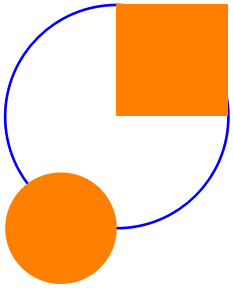

In [40]:
Graphics[{Blue, Thick, Circle[{-1, 1}, 1], Orange, 
  Rectangle[{-1, 1}, {0, 2}],Disk[{-3/2,0},1/2]},ImageSize->Small]

The styles are applied incrementally in the order the graphics objects appear. E.g. note that, in the snippet above, `Orange` overwrites `Blue` and gets applied to both `Rectangle` and `Disk`.  

It is often good practice to isolate styles by using lists:

-Graphics-
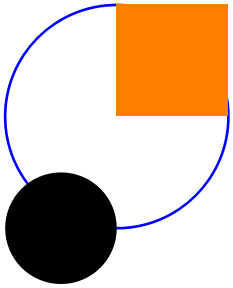

In [42]:
Graphics[
{{Blue, Thick, Circle[{-1, 1}, 1]},
{Orange, Rectangle[{-1, 1}, {0, 2}]},
{Disk[{-3/2,0},1/2]}
},ImageSize->Small]

## Working With Lists:
- Write an arithmetic sequence of numbers: use `Range`

In [43]:
Range[10, 0, -2]

{10, 8, 6, 4, 2, 0}

- Write lists with a more complicated logic: use `Table` (similar to Python's list comprehension)

In [46]:
Table[
(*store elements 4n-2*)
4*n - 2,

(*for n starting from 0 to 10 (in steps of 1)*)
{n, 0, 10}]

{-2, 2, 6, 10, 14, 18, 22, 26, 30, 34, 38}

- Return a list with an element added to the end: use `Append`

In [47]:
Append[Range[0, 10], 12]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12}

- Return a list with an element added to the end AND reset its definition: use `AppendTo`

In [48]:
list1 = Range[0, 10];
AppendTo[list1, 12];
list1

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12}

<div class="alert alert-block alert-info">
<b>Tip:</b> We're using `;` after some lines in multi-line code blocks to supress the output from printing to the screen.
</div>

- Similarly, the functions `Prepend` and `PrependTo` add elements to the beginning of a list

- Find all possible ordered combinations of a list: use `Tuples`

In [53]:
(*Find all length-2 combinations with elements drawn from {1,2,3}*)
Tuples[Range[3], 2]

{{1, 1}, {1, 2}, {1, 3}, {2, 1}, {2, 2}, {2, 3}, {3, 1}, {3, 2}, {3, 3}}

- You can use `Subsets` if order doesn't matter

In [55]:
Subsets[Range[3], {2}]

{{1, 2}, {1, 3}, {2, 3}}

- Divide a list into sublists of a given length: use `Partition`

In [58]:
Partition[Range[9], 2]

{{1, 2}, {3, 4}, {5, 6}, {7, 8}}

- Recombine sublists into one big list: use `Flatten`

In [59]:
Flatten[Partition[Range[9], 2]]

{1, 2, 3, 4, 5, 6, 7, 8}

## Writing Your Own Functions
Since the Wolfram Language capitalizes built-in functions, it's considered good practice to name user defined functions with a lower case letter, and capitalize multi-word function names.

In [61]:
sumFunction[var1_, var2_] := var1 + var2
sumFunction[1, 2]

3

Let's break this down: we've defined a function called `sumFunction`, which takes exactly two positional arguments and adds them together.  
- Positional arguments are followed by an underscore. In the Wolfram Language this is called a pattern.
- We used ":=" to define our function. This is called `SetDelayed`, and only evaluates the RHS of the function's body when the function gets called

In [69]:
sumFunction2[var1_, var2_,defaultValueVar3_:4] := var1 + var2 + defaultValueVar3
sumFunction2[1, 2]
sumFunction2[1, 2, 3]

7
6

- We can also define optional arguments with default values by using `argument_:argumentValue`. The function can then be called with either two or three arguments
- If instead we wanted to define a function which takes an undefined number of positional arguments, we could use two (or three) underscores to signal one (zero) or more arguments

In [75]:
sumFunction3[vars__] := Apply[Plus,{vars}]
sumFunction3[1, 2]
sumFunction3[1, 2, 3]

3
6

- We can use pattern tests to restrict the type of arguments a function can take

In [88]:
(*Only sum integers*)
sumFunction4[vars__Integer] := Apply[Plus,{vars}]
sumFunction4[1, 2, 3]

(*Returns unevaluated*)
sumFunction4[1, 2, 3.]

6
sumFunction4[1, 2, 3.]

- We can use pattern matching to specify multiple forms of arguments (similar to Julia's Multiple Dispatch)

In [97]:
flexibleForm[{a_, b_}, c_] := "tuple first"
flexibleForm[c_, {a_, b_}] := "number first"

flexibleForm[{Red,"Car"},1]
flexibleForm[Red,{"Car",1}]

tuple first
number first

### Mapping over inputs
If you want to apply your function to a whole list of inputs, you can use `Map`:

In [104]:
square[n_] := n^2

(*Map the function square over the list of arguments {0,1,2,3,4,5}*)
Map[square, Range[0, 5]]

(*Fancy shorthand syntax*)
square /@ Range[0, 5]

{0, 1, 4, 9, 16, 25}
{0, 1, 4, 9, 16, 25}

Note, many functions are also `Listable`, which means they automatically `Map` or `Thread` their inputs. In the previous example, the following would also work:

In [109]:
square[Range[0,5]]

{0, 1, 4, 9, 16, 25}

### Pure functions (optional, but you'll see it around)
If you're only going to use a function in a single context, you don't need to define it outside of that context.

Instead, you can use a pure function:
`#^2 &`

The `#` is called a slot, and it shows where the input is supposed to go
The `&` is a label that indicates a pure function is being used and activates the nearest slot

In [112]:
Map[#^2 &, Range[0, 5]]

(*equivalent terse syntax*)
#^2 & /@ Range[0, 5]

{0, 1, 4, 9, 16, 25}
{0, 1, 4, 9, 16, 25}

## Nesting
Fractal-like behaviour is often the result of nesting.  
Nesting means that a function's output is fed back into the same function as input.

In [115]:
function[function[function[x]]]

Nest[function, x, 3]

function[function[function[x]]]
function[function[function[x]]]

Let's write a function to add 3 to the input:

In [117]:
add3[input_] := input + 3

Nest[add3, 1, 3]

10

- If we want to see intermediate results, we can use `NestList` instead:

In [119]:
NestList[add3, 1, 3]

{1, 4, 7, 10}

- Keep going until a condition is met with `NestWhile`

In [125]:
NestWhile[add3, 1, # < 40 &]
NestWhileList[add3, 1, # < 40 &]

40
{1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40}

- We can also keep nesting until the result no-longer changes using `FixedPoint`

In [132]:
(*
Starting from the value 1. 
nest the pure function x = (x +2/x)/2
until the result converges
*)
FixedPointList[(# + 2/#)/2 &, 1.]

{1., 1.5, 1.41667, 1.41422, 1.41421, 1.41421, 1.41421}

## Dynamic Outputs
The Wolfram Language has powerful `Dynamic` functionality, which allows one to visualize an output as it's being computed in real time.

<div class="alert alert-block alert-danger">
<b>Alert: </b>
Unfortunately, these don't play niceley with the Jupyter Front-End. When we deem these are invaluable for the content, we'll switch to using the Wolfram Cloud. Otherwise, we'll precompute frames and output animations as movies.  
</div>